# Assignment 2: Fraud Detection

## Case Study

<p>An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. You can find the dataset above. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5%.</p>

## 1 Aims, Objectives & Plan
### 1.1 Aims & Objectives
The primary objective is to analyse a medium sized dataset containing insurance claims from an insurance company with the goal of identifying potential fraudulant claims. The project requires a minumum of two techniques to provide predictions or valuable insights.

Secondly, a technical report which consists of a narration around the analysis conducted for the project. This will be a jupyter notebook document containing the key procedures taken for each step such as justifying choices made in pre-processing, the models solutions, various visualisations of the analysis and testing with performance metrics such as F1, recall, confusion matrix etc.

Using the information gathered from analysis and techniques, insights will be produced to quantify the loss incurred when the company loses customers which will be calculated with the model prediction errors.

### 1.2 Plan - Gantt Chart
The following Gantt chart provides insight into how time was allocated for each key section of the project.
<img src="gantt_figure.jpg">

## 2 Understanding the Case Study
### 2.1 Case Study Analysis
In this section I will present my understanding of the case study with the 4 critical points found in the case description.
#### 2.1.1 Predicting a Customers Level of Risk
Each row of the datasets provide information for an individual customers claim with labels depicting if the claim was fraudulant or legitimate. The client needs to know what level of risk future clients pose for future cases, using historical data.

#### 2.1.2 Cost of Fraudulant Cases for Customers and Company
Cases provided contain various cost factors such as property claim, injury claims etc. Part of the case study specifies the need to highlight the cost risk for fraudulant cases company and customer alike, the case study specifies the risk of losing customers due to cost. 

#### 2.1.3 Unbiased Prediction Model to Flag Fraudulant Cases
The case study specifies the need of unbiased predictions. This can be acheived in pre-processing ensuring the training/test data is well balanced with fair distributions. Techniques such as regularization and post-processing techniques such as equalizing false positives and false negatives.

#### 2.1.4 Accuracy and Error Rate of the Models
Accuracy measures are needed to ensure the model is making correct predictions/accurate insights, such as correctly classified instances. The error rate will also be calculated to complement accuracy. The case study specifies the client is expecting a balanced error rate of around 5%.

#### 2.1.5 Quantify Incurred Loss
The client needs to know an estimate for how much money they will lose if a customer is lost which will need to be calculated from the models prediction error resulting in a pricing model. If the model predicts incorrectly and a fraudulant customer has not been identified how much could this model cost the company over time.

## 3 Pre-Processing

#### Importing Initial Permitted Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Library configurations
pd.set_option('display.max_columns', None)

#### Loading the Datasets into Pandas Dataframes for Analysis

In [2]:
# Converting each of the CSV files to pandas dataframes
customers_no_target_df = pd.read_csv("./Data/TrainData/Traindata_withoutTarget.csv")
customers_target_df = pd.read_csv("./Data/TrainData/Traindata_with_Target.csv")
claims_df = pd.read_csv("./Data/TrainData/Train_Claim.csv")
demographics_df = pd.read_csv("./Data/TrainData/Train_Demographics.csv")
policy_df = pd.read_csv("./Data/TrainData/Train_Policy.csv")
vehicle_df = pd.read_csv("./Data/TrainData/Train_Vehicle.csv")

# Joining the data into one large dataframe for pre-processing
df1 = pd.merge(claims_df, demographics_df, on='CustomerID')
df2 = pd.merge(df1, policy_df, on='CustomerID')
full_df = pd.merge(df2, customers_target_df, on='CustomerID')

fraud = full_df["ReportedFraud"] == "Y"
not_fraud = full_df["ReportedFraud"] == "N"

In [3]:
full_df.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,N


### 3.1 Preparing the labels

#### 3.1.1 Dealing with class imbalance
The following cell shows the class distributions, around 73% of the labels are non-fraudulant claims and around 27% fraudulant claims. Stratified sampling will be used when selecting the train and test sets to ensure the distribution stays consistant.

In [4]:
customers_target_df["ReportedFraud"].value_counts(normalize=True)

N    0.730025
Y    0.269975
Name: ReportedFraud, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

y = full_df["ReportedFraud"]
X = full_df.drop("ReportedFraud", axis=1)

# Splitting data and labels, stratify the datasets using the labels
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

We can confirm the train and test labels have consistant distribution with value counts and normalizing the output for the distributions.

In [6]:
# Confirming the labels have been correctly stratified
y_train.value_counts(normalize=True)

N    0.730016
Y    0.269984
Name: ReportedFraud, dtype: float64

In [7]:
y_test.value_counts(normalize=True)

N    0.730062
Y    0.269938
Name: ReportedFraud, dtype: float64

### 3.2 Removing Synonymous and Noisy Atrributes
In the following section I will outline some of my research into the attributes, here there will be examples of strong and weak attributes and the ones I will drop for the sake of simplifying the model and reducing noise and bias.

#### 3.2.1 Identifying Key Attributes (SeverityOfIncident)
One of my first observations when viewing the data was that confirmed fraudulant cases where often "Major Damage" cases while legitimate cases where "Total Loss" or minimal damage cases. This will be illustrated in the next cell with a histogram, showing a very clear difference in total cases between the two classes. This attribute should prove quite useful when training a DecisionTree in later sections.

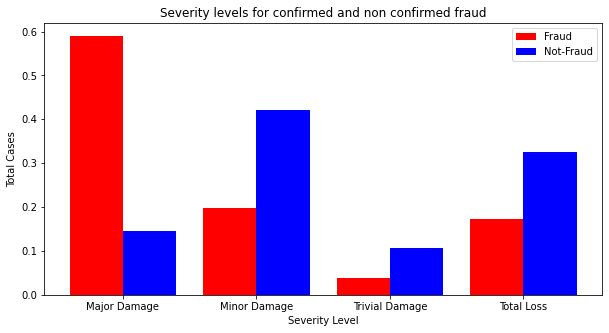

In [8]:
soi_fraud = full_df[fraud]["SeverityOfIncident"]
soi_not_fraud = full_df[not_fraud]["SeverityOfIncident"]
colors = ["Red", "Blue"]
label = ["Fraud", "Not-Fraud"]
title = "Severity levels for confirmed and non confirmed fraud"
x_plots = [soi_fraud, soi_not_fraud]
plt.figure(figsize = (10, 5))
plt.title(title)
plt.hist(x_plots, bins=np.arange(5)-0.5, density=True, color=colors)
plt.xlabel('Severity Level')
plt.ylabel('Total Cases')
plt.legend(label)
plt.show()

#### 3.2.2 Identifying Key Attributes (AuthoritiesContacted)
Fraudulent cases tend to call departments other than police however there are a small number of cases where fraud cases are not reported, which makes sense concidering how fraud tends to work.

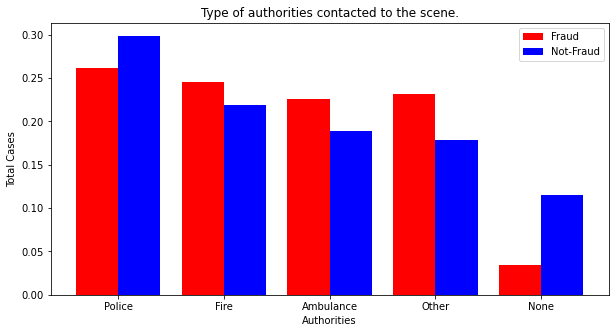

In [9]:
auth_fraud = full_df[fraud]["AuthoritiesContacted"]
auth_not_fraud = full_df[not_fraud]["AuthoritiesContacted"]
colors = ["Red", "Blue"]
label = ["Fraud", "Not-Fraud"]
title = title = "Type of authorities contacted to the scene."
x_plots = [auth_fraud, auth_not_fraud]

plt.figure(figsize = (10, 5))
plt.title(title)
plt.hist(x_plots, bins=np.arange(6)-0.5, density=True, color=colors)
plt.xlabel('Authorities')
plt.ylabel('Total Cases')
plt.legend(label)

plt.show()

#### 3.2.3 Identifying Key Attributes (NetCapital)
The capital attributes I wanted to investigate, my intention was to find a pattern in the dates claims were made and analyse the net average capital on that day. To this I summed the capital gain and loss for each column, using a helper function I got the mean for values on that date. Although this was not entirely insightful, I did notice the net averages were tighter at the start of the recordings and spread out towards later in the year, from this I found there could be possibly outliers in the capital loss / capital gain.

In [10]:
def avg_dup_dates(dates, full_df):
    new_df = []
    for date in dates:
        net_mean = full_df[full_df["DateOfIncident"] == date]["CapitalNet"].mean()
        new_df.append([date, net_mean])
    return pd.DataFrame(new_df)

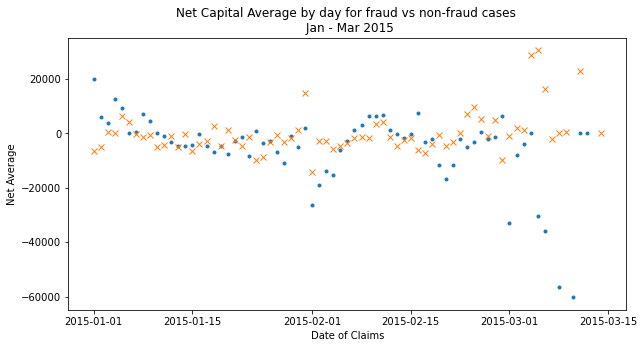

In [11]:
full_df["CapitalNet"] = full_df["CapitalLoss"] + full_df["CapitalGains"]
full_df["DateOfIncident"] = pd.to_datetime(full_df["DateOfIncident"])

dates = sorted(full_df["DateOfIncident"].unique())

net_frauds = avg_dup_dates(dates, full_df[fraud])
net_not_frauds = avg_dup_dates(dates, full_df[not_fraud])

fig, ax = plt.subplots(figsize=(10,5))
x1, y1 = net_frauds[0], net_frauds[1]
x2, y2 = net_not_frauds[0], net_not_frauds[1]

ax.plot_date(x1, y1, fmt=".") # Fraud
ax.plot_date(x2, y2, fmt="x") # not Fraud

ax.set(xlabel="Date of Claims",
       ylabel="Net Average",
       title="Net Capital Average by day for fraud vs non-fraud cases \n Jan - Mar 2015")

plt.show()

#### 3.2.4 Creating New Attribute (Net Capital)
As mentioned previously, I wanted to create a new Net Capital attribute, I found in my analysis there could be enough petterns between fraud and non fraud cases that it may be a strong attribute for future models.

I will make a transformer class that can be added to a future pipeline in the following cell. This will allow me to add or remove the attribute easily when fine tuning the models.

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
# The class will inherit from the above classes, this will allow the transformer
# to be used with scikits pipeline classes

class CombineAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_location=True):
        self.add_location = add_location
    def fit(self, X, y=None):
        return None
    def transform(self, X):
        X["NetCapital"] = X["CapitalGains"] + X["CapitalLoss"]
        if add_location:
            X["IncidentArea"] = X["IncidentState"] + " " + X["IncidentCity"]
        return X

### 3.3 Dealing with Missing Values
There are 3 columns I have identified as having problematic missing values, there are two ways I'd like to deal with these.

Solution 1: Drop the rows associated with the values as it is such a small sample size of the entire dataset. 

Solution 2: I impute the missing values, "IncidentTime" and "Witnesses" I will impute with the most common values and for "AmountOfTotalClaim" I can attempt to sum the other claim columns or take the mean value given there are no major outliers.

Solution 2 would allow me to preserve the distribution, therefore I will first explore imputation to fill the small amount of missing values.

Below I will make a transformer class for solution 1 incase I want to explore this later, for now I will impute the missing values.

In [14]:
inctime, witnesses, aot_claim = len(full_df[full_df["IncidentTime"] == -5]), len(full_df[full_df["Witnesses"] == "MISSINGVALUE"]), len(full_df[full_df["AmountOfTotalClaim"] == "MISSEDDATA"])
print(f"IncidentTime: {inctime}")
print(f"Witnesses: {witnesses}")
print(f"AmountOfTotalClaim: {aot_claim}")

IncidentTime: 31
Witnesses: 46
AmountOfTotalClaim: 50


In [15]:
class RemoveMissingValues(BaseEstimator, TransformerMixin):
    def __init__(self, incident_time=True, witnesses=True, totalclaim=True):
        self.incident_time = incident_time
        self.witnesses = witnesses
        self.totalclaim = totalclaim
        
    def fit(self, X, y=None):
        return None
    
    def transform(self, X, y=None):
        if self.incident_time:
            time_missing = X[X["IncidentTime"] == -5].index
            X, y = X.drop(time_missing), y.drop(time_missing)
            
        if self.witnesses:
            witnesses_missing = X[X["Witnesses"] == "MISSINGVALUE"].index
            X, y= X.drop(witnesses_missing), y.drop(witnesses_missing)
        
        if self.totalclaim:
            totalclaim_missing = X[X["AmountOfTotalClaim"] == "MISSEDDATA"].index
            X, y = X.drop(totalclaim_missing), y.drop(totalclaim_missing)
        
        return X, y

### 3.4 Dealing with duplicate values
Below is some breif investigating of duplicate values, I checked the dataset for duplicate rows by checking the rows against each other without the customerID as this is a confirmed primary key for the dataset, which are always unique. My theory here is that there could be some duplicate claims with different CustomerID's however I did not find any.

I decided to check some of the columns, I noted that the country attribute had only 1 unique value. I will consider this when creating the pipeline, by keeping this feature it would cause a bias in future models, its not a guarentee based on the case study that all future claims will be from india specificially.

In [16]:
# Checking if any rows are duplicated, expluding the customerID
full_df.drop(["CustomerID"], axis=1).duplicated().value_counts()

False    28836
dtype: int64

In [17]:
# Country is not a useful column to keep as all values
full_df["Country"].value_counts()

India    28834
Name: Country, dtype: int64

### 3.5 Dealing with Outliers

In [18]:
class OutlierManager(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        return None
    
    def transform(self, X, y):
        policyprem_outliers = X[X["PolicyAnnualPremium"] < 0].index
        X, y = X.drop(policyprem_outliers), y.drop(policyprem_outliers)
        
        return X, y

#### 3.6.1 Identifying Potential Outliers
Previously it was noted that CapitalNet had some potential outliers, to investigate further, below I have used pandas describe() function to outline some of the key metrics for each feature.

CapitalNet: The maximum and minimum values are quite distant from the mean, indicating possible outliers.

In [19]:
full_df.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,CapitalNet
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000
mean,11.746047,1.823207,0.985782,7337.118428,7283.870197,37687.129387,38.815370,502436.579068,23066.569566,-24940.612429,129312.517097,203.067867,1114.282529,1255.528382,9.836680e+05,-1874.042863
std,6.170069,0.980099,0.784764,4427.638593,4375.842738,17977.048232,7.996377,72250.868871,27637.813724,27913.209608,11114.060267,99.932951,546.632816,223.013899,1.969282e+06,38285.827348
min,-5.000000,1.000000,0.000000,0.000000,0.000000,109.000000,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,1.000000,500.000000,-1.000000,-1.000000e+06,-111100.000000
25%,6.000000,1.000000,0.000000,4743.750000,4862.000000,32193.250000,33.000000,448603.000000,0.000000,-50000.000000,119698.750000,126.000000,622.000000,1122.007500,0.000000e+00,-31600.000000
50%,12.000000,1.000000,1.000000,7147.000000,7051.000000,42457.500000,38.000000,466691.000000,0.000000,0.000000,129278.500000,199.000000,1000.000000,1265.205000,0.000000e+00,0.000000
75%,17.000000,3.000000,2.000000,10571.250000,10327.000000,49535.750000,44.000000,603848.000000,49000.000000,0.000000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,21500.000000
max,23.000000,4.000000,2.000000,21450.000000,23670.000000,79560.000000,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,100500.000000


### 3.7 Dealing with Collinearity

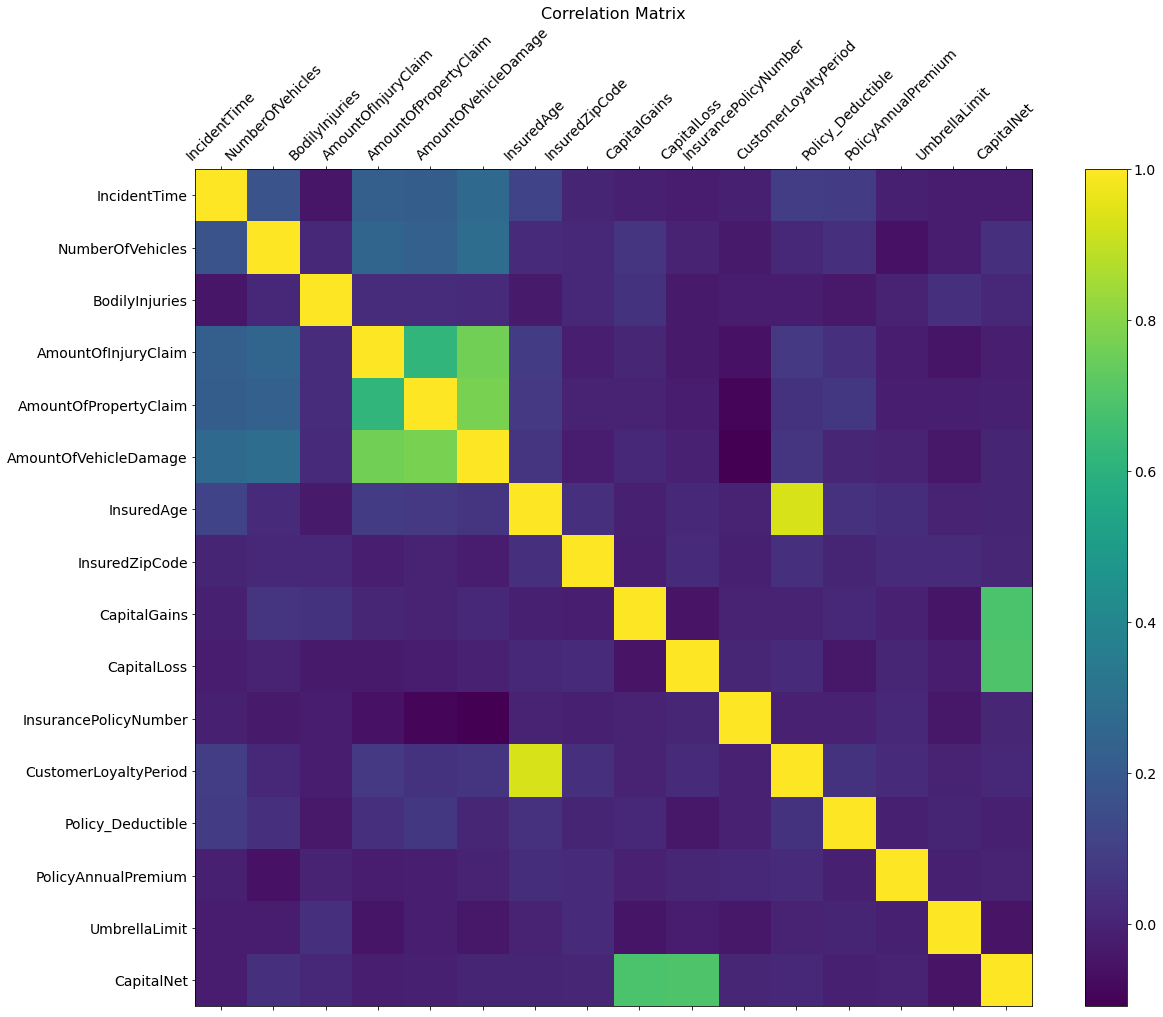

In [20]:
from sklearn.preprocessing import LabelEncoder


f = plt.figure(figsize=(19, 15))
plt.matshow(full_df.corr(), fignum=f.number)
plt.xticks(range(full_df.select_dtypes(['number']).shape[1]), full_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(full_df.select_dtypes(['number']).shape[1]), full_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### 3.8 Preparing Text and Categorical Attributes

In [21]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns
numerical_attributes = [col for col in x_train.columns if col not in categorical_attributes]
numerical_attributes

['IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

#### 3.8.1 Encoding categorical attributes with ordinal encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
claims_cat = x_train[categorical_attributes]
claims_cat_encoded = ord_encoder.fit_transform(claims_cat)
claims_cat_encoded

array([[1.6800e+04, 5.7000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.5481e+04, 3.8000e+01, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        3.0000e+00],
       [2.0870e+03, 1.6000e+01, 3.0000e+00, ..., 0.0000e+00, 6.0000e+00,
        0.0000e+00],
       ...,
       [9.4920e+03, 1.3000e+01, 0.0000e+00, ..., 2.0000e+00, 1.0000e+00,
        3.0000e+00],
       [6.9250e+03, 4.6000e+01, 0.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        1.0000e+00],
       [8.6780e+03, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00]])

#### 3.8.1 Encoding categorical attributes with OneHot Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
claims_cat = x_train[categorical_attributes]
claims_cat_1h_encoded = oh_encoder.fit_transform(claims_cat)
claims_cat_1h_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 3.9 Creating the Pre-Processing Pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [25]:
totalclaim_missing_idx = x_train[x_train["AmountOfTotalClaim"] == "MISSEDDATA"].index
x_train, y_train = x_train.drop(totalclaim_missing_idx), y_train.drop(totalclaim_missing_idx)
x_train["NetCapital"] = x_train["CapitalGains"] + x_train["CapitalLoss"]
x_train["AmountOfTotalClaim"] = x_train["AmountOfTotalClaim"].astype('int')

totalclaim_missing_idx_test = x_test[x_test["AmountOfTotalClaim"] == "MISSEDDATA"].index
x_test, y_test = x_test.drop(totalclaim_missing_idx_test), y_test.drop(totalclaim_missing_idx_test)
x_test["NetCapital"] = x_test["CapitalGains"] + x_test["CapitalLoss"]
x_test["AmountOfTotalClaim"] = x_test["AmountOfTotalClaim"].astype('int')

In [26]:
cat_attributes = [
    "IncidentTime",
    "Witnesses",
    "SeverityOfIncident",
    "AuthoritiesContacted",
    "PropertyDamage",
    "InsuredOccupation",
    "InsuredHobbies",
    "DateOfPolicyCoverage",
    "Policy_CombinedSingleLimit",
    "InsuredRelationship",
]

num_attributes = [
    "NumberOfVehicles",
    "BodilyInjuries",
    "AmountOfTotalClaim",
    "AmountOfInjuryClaim",
    "AmountOfPropertyClaim",
    "AmountOfVehicleDamage",
    "InsuredAge",
    "CapitalGains",
    "CapitalLoss",
    "InsurancePolicyNumber",
    "CustomerLoyaltyPeriod",
    "Policy_Deductible",
    "PolicyAnnualPremium",
    "NetCapital",
]

cat_idx = [x_train.columns.get_loc(i) for i in cat_attributes]
num_idx = [x_train.columns.get_loc(i) for i in num_attributes]
inc_time_idx = x_train.columns.get_loc('IncidentTime')
wit_idx = x_train.columns.get_loc('Witnesses')

In [27]:
lb_train = LabelBinarizer()
lb_test = LabelBinarizer()

y_train, y_test = pd.DataFrame(lb_train.fit_transform(y_train)), pd.DataFrame(lb_test.fit_transform(y_test))

cat_transformer = Pipeline([
    ("impute_incident_time", SimpleImputer(missing_values=-5, strategy='most_frequent')), 
    ("impute_witnesses", SimpleImputer(missing_values="MISSINGVALUE", strategy='most_frequent')),
    ("1h_encoder", OneHotEncoder(handle_unknown='ignore'))]
)

num_transformer = Pipeline([
    ("std_scaler", StandardScaler())]
)

full_pipeline = ColumnTransformer(
    transformers = [
        ("num", num_transformer, num_attributes), 
        ("cat", cat_transformer, cat_attributes)
    ]
)

In [28]:
data_prepared = full_pipeline.fit_transform(x_train)

## 4 Technique 1 - Classification, Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf_gini = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
tree_clf_gini.fit(data_prepared, y_train) 

DecisionTreeClassifier(random_state=42)

### 4.1 Motivation for choosing the technique and provide a schematic figure of the process
Based on the dataset provided it's been determined that the task is a binary classification problem. Early in my analysis, I identified many categorical attributes that had some strong patterns. My first thought was to explore the possibility of training DecisionTreeModel, due to the large amounts of categorical attributes.

The Decision Tree Classifier can branch using the categorical attributes, this allows for intuitive and interpretable decision-making. I will explore various hyper parameters such as changing the depth and or the criterion.

Another reason for the decision tree, is there was a large amount of categorical attributes with missing info usually represented with "?", instead of removeing or imputing these values, I left them so they could be used as other categories which will naturally be branched by the decision tree.

Below is an example of a Decision Tree Classifier with a max depth of 3 to illustrate the form a decision tree takes and how decisions are made for each case.

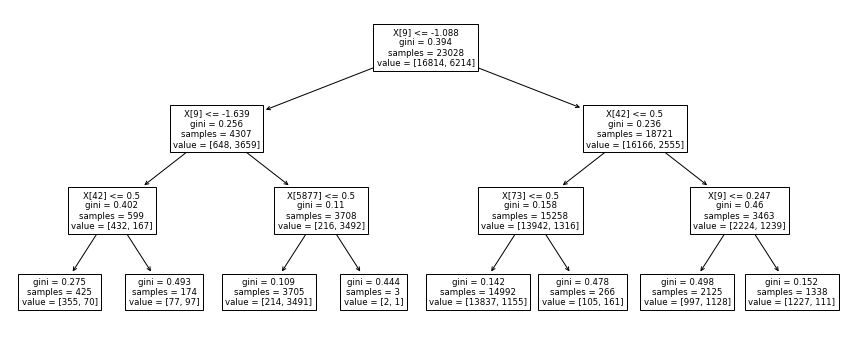

In [32]:
tree_clf_dep3 = DecisionTreeClassifier(max_depth=3, splitter="best", random_state=42)
tree_clf_dep3.fit(data_prepared, y_train)

plt.figure(figsize=(15,6))
plot_tree(tree_clf_dep3)
plt.show()

### 4.2 Setting hyper parameters with rationale
In the following section (4.3) I will perform a grid search analysing 3 primary hyper parameters.

Maximum Depth: The maximum depth of a decision tree determines the number of level/splits a model can have, I believe this to be an important factor as the deeper a tree the more chance it could lead to overfitting, and also compramise model efficiency. I will explore various depths within a reasonable range.

min_samples_split & min_samples_leaf: These final two hyper parameters I will explore also, as they can be a common cause of overfitting depending on how many instance are created.

### 4.3 Optimising hyper parameters with Grid Search

In [33]:
tree_clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

DT_GS = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 20, 5),
                              'max_depth':         range(2, 20, 5),
                              'min_samples_leaf':  range(10,50, 10)},
                               scoring=make_scorer(accuracy_score), return_train_score=True)
DT_GS.fit(data_prepared, y_train)
results = DT_GS.cv_results_

In [35]:
print(results['mean_test_score'])
print(results['mean_test_score'].max())
print(results['std_test_score'].max())
print(DT_GS.best_estimator_)

[0.87211183 0.87211183 0.87211183 0.87211183 0.87211183 0.87211183
 0.87211183 0.87211183 0.87211183 0.87211183 0.87211183 0.87211183
 0.87211183 0.87211183 0.87211183 0.87211183 0.91445167 0.91445167
 0.91445167 0.91445167 0.91401755 0.91401755 0.91401755 0.91401755
 0.91397402 0.91397402 0.91397402 0.91397402 0.91293179 0.91293179
 0.91293179 0.91293179 0.92613317 0.92613317 0.92613317 0.92613317
 0.92778356 0.92778356 0.92778356 0.92778356 0.92787032 0.92787032
 0.92787032 0.92787032 0.92739254 0.92739254 0.92739254 0.92739254
 0.92491733 0.92491733 0.92491733 0.92491733 0.92826122 0.92826122
 0.92826122 0.92826122 0.92752289 0.92752289 0.92752289 0.92752289
 0.92739254 0.92739254 0.92739254 0.92739254]
0.9282612161920698
0.0048104042667335275
DecisionTreeClassifier(max_depth=17, min_samples_leaf=20, random_state=42)


### 4.4 Performance metrics for training

In [36]:
tree_clf_best = DecisionTreeClassifier(max_depth=17, min_samples_leaf=20, random_state=42)
tree_clf_best.fit(data_prepared, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=20, random_state=42)

In [37]:
data_test = full_pipeline.transform(x_test)
tree_clf_best.score(data_test, y_test)

0.9317471344216742

In [38]:
from sklearn.metrics import mean_squared_error, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

predictions = tree_clf_best.predict(data_test)

tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.26125249391790656

In [39]:
rs_micro = recall_score(y_test, predictions, average='micro')
rs_macro = recall_score(y_test, predictions, average='macro')
print(f"Recall Micro: {rs_micro.round(3)}")
print(f"Recall Macro: {rs_macro.round(3)}")

Recall Micro: 0.932
Recall Macro: 0.898


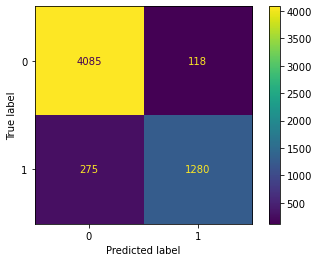

In [40]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

tree_cm = confusion_matrix(y_test, predictions)

color = 'white'
tree_matrix = ConfusionMatrixDisplay(confusion_matrix=tree_cm, display_labels=tree_clf_best.classes_)
tree_matrix.plot()
plt.show()

In [41]:
TP, FN, FP, TN = tree_cm[0][0], tree_cm[0][1], tree_cm[1][0], tree_cm[1][1]

accuracy = (TP + TN) / (TP + FN + FP + TN)
error_rate = (FP + FN) / (TP + FN + FP + TN)
c1_rate = FP / (TN + FP)
c2_rate = FN / (FN + TP)
bal_error_rate = (c1_rate + c2_rate) / 2

print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Balanced Error Rate: {bal_error_rate}")

Accuracy: 0.9317471344216742
Error Rate: 0.06825286557832581
Balanced Error Rate: 0.10246202949508582


## 5 Technique 2 - Classification, K-Nearest Neighbor Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

### 5.1 Motivation for choosing the technique and provide a schematic figure of the process
For my second classifier I decided to create a K-Nearest Neighbor Classifier, my rationale for this decision is firstly similar to the decision tree, the data provided had a large amount of categorical attributes. Due to this a KNN should have no trouble forming decision boundaries on the data.

Unlike decision trees, KNN's do not make large assumption based on the distrebution, and concidering the fraud, non_fraud distribution is quite different, I believe it would be a good idea to explore KNN models further.

### 5.2 Setting hyper parameters with rationale
The KNeighborsClassifier has 3 primary hyperparameters that I will focus on.

n_neighbors: This represents the number neighbors to consider when making predictions, I will start with 11 neighbors as to avoid noisy predictions.

p: The p hyperparameter represents the power parameter for the "Minkowski distance", I'll use 2 for this always since there are two classifications, fraud, non fraud.

metric: This parameter specifies the metric used to compute distance, there are many I want to explore starting with euclidean distance. This will be a key hyperparemeter that should tuned.

### 5.3 Optimising hyper parameters

In [43]:
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean")
knn.fit(data_prepared, y_train.values.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### 5.4 Performance metrics for training

In [44]:
knn.score(data_test, y_test)

0.9399096908648836

In [45]:
knn_prediction = knn.predict(data_test)
knn_mse = mean_squared_error(y_test, knn_prediction)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.24513324771461817

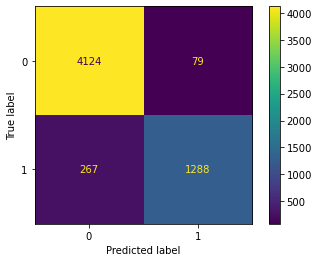

In [46]:
knn_cm = confusion_matrix(y_test, knn_prediction)

color = 'white'
matrix = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
matrix.plot()
plt.show()

In [47]:
k_TP, k_FN, k_FP, k_TN = knn_cm[0][0], knn_cm[0][1], knn_cm[1][0], knn_cm[1][1]

k_accuracy = (k_TP + k_TN) / (k_TP + k_FN + k_FP + k_TN)
k_error_rate = (k_FP + k_FN) / (k_TP + k_FN + k_FP + k_TN)
k_c1_rate = k_FP / (k_TN + k_FP)
k_c2_rate = FN / (k_FN + k_TP)
k_bal_error_rate = (k_c1_rate + k_c2_rate) / 2

print(f"Accuracy: {k_accuracy}")
print(f"Error Rate: {k_error_rate}")
print(f"Balanced Error Rate: {k_bal_error_rate}")

Accuracy: 0.9399096908648836
Error Rate: 0.06009030913511636
Balanced Error Rate: 0.09988968222820478


## 6 Comparison of Metrics Performance for Testing

### 6.1 Comparison with appropriate metrics for testing
Although the prediction metrics at first seemed positive with accuracies of around 0.94 for both the KNN and Decision Tree models. After calulating the Balanced Error Rate for both models, they both fell to around a 10% prediction error on the new data.

This means that if the client was to adopt either of these models they would be risking a 10% loss in potential fraudulant claims. I have tried to represent this below. I took the mean loss for all fraudulant total claims multipled by the total fraud claims. And then for each model mulipled by the error to get the expected loss within the time period of the data.

In [48]:
totalclaim_missing_idx = full_df[full_df["AmountOfTotalClaim"] == "MISSEDDATA"].index
full_df = full_df.drop(totalclaim_missing_idx)
full_df["AmountOfTotalClaim"] = full_df["AmountOfTotalClaim"].astype('int')

total_fraud = len(full_df["AmountOfTotalClaim"][fraud])
sum_fraud_claim = full_df["AmountOfTotalClaim"][fraud].sum()
mean_fraud_claim = full_df["AmountOfTotalClaim"][fraud].mean()

total_loss = (total_fraud * mean_fraud_claim)
tree_potential_loss = total_loss * bal_error_rate
knn_potential_loss = total_loss * k_bal_error_rate

print(f"Mean Loss Loss Revenue (No model): {total_loss}")
print(f"Tree Model Expected Loss Revenue: {tree_potential_loss.round(2)}")
print(f"KNN Model Expected Loss Revenue: {knn_potential_loss.round(2)}")

Mean Loss Loss Revenue (No model): 456389175.0
Tree Model Expected Loss Revenue: 46762561.11
KNN Model Expected Loss Revenue: 45588569.66


### 6.2 Model selection

#### 6.2.1 ROC Curve
A reciever operating characteristic curve (roc) will be used to show the performance of the classification models. Below I'll create a model and plot it to show the performance of the trained KNN classification model at different classification thresholds.

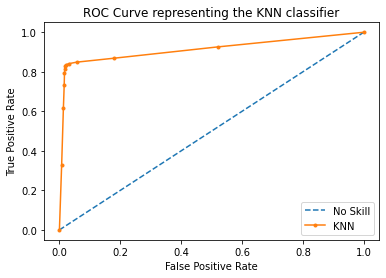

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

size = data_test.size
knn_probs = knn.predict_proba(data_test)
knn_probs = knn_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

knn_auc = roc_auc_score(y_test, knn_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, knn_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve representing the KNN classifier")
plt.legend()
plt.show()

## 7 Final Recommendation of Best Model

### 7.1 Discussing the results, overfitting, complexity and efficiency
In the end for the Decision Tree and K-Nearest Neighbour models, I was receiving around about the same metrics, with the KNN model performing slightly better based on the Balanced Error Rate, which was the primary metric the client wanted to focus on. I believe both models were overfitting slightly due to poor feature selection, and lack of appropriate cross validation.

I believe the Decision Tree Model ended up being to complex with far too many branches due to poor feature selection. KNN however seemed based on analysis to suit the problem better, in terms of accuracy and error rate. 

In terms of compiling the models the decision tree performed far slower every time to train that the KNN, again due to hyper parameters, this could be solved by decreasing the max depth and complexity of the splits.

### 7.2 Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

If there was no alternative I would put forward the KNN model with the error rate of Balanced Error Rate of 9%. Considering the distribution of fraudlant cases is around a ratio of 26:74 I believe the client would recieve a great benefit in potentially avoided fraudulant claims.

## 8 Conclusion


### 8.1 What has been successfully accomplished and what has not been successful?
In conclusion, when comparing the Decision Tree and K-Nearest Neighbors (KNN) models, their performance metrics were similar, but the KNN model slightly outperformed the Decision Tree model based on the Balanced Error Rate, which was the primary metric of interest for the client.

I feel that a error rate within 5% of the target provided by the client is a good start, and with some further hyper parameter tuning and feature selection I could achieve a closer result.

Ellaborating further on feature selection, some of the transformations performed on the categorical attributes could have been varied, instead of using 1hot on all categorical attributes it would have been a better decision to use a standard encoder for the attributes with less unique values. I also believe there were more columns that could possibly have been created based on some of the numerical attributes.

### 8.2 Reflecting back on the analysis, what could you have done differently if you were to do the project again?
Firstly, I would have taken more care encoding the categorical attributes as mentioned previously, using different encoders as appropriate.

Secondly, hyper parameter tuning for the KNN model should have been far more thorough possibly using grid search as was used for the decision tree algorithm. Given the performance difference between the two models, I'm certain there would be much better result coming from the KNN with better hyperparameter tuning.

Lastly, time allocation for each section of the task was poor. In future I would have made a better structured gantt chart and paired this with a kanban board to better structure a project of this scale along side studies.

### 8.3 Provide a wish list of future work that you would like to do
I have been interested in reinforcement learning specifically in 3D space environemnents. I hope to start a project with tools such as unity to train nodes to perform specific tasks or adapt to their environment. I would also like to explore computer vision.